# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Adi Purnomo
- **Email:** dev.adipurnomo
- **ID Dicoding:** adi.purnomo

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren suhu rata-rata harian berubah dari tahun ke tahun selama periode 2013–2017 di stasiun Aotizhongxin?

2. Bagaimana pengaruh arah dan kecepatan angin terhadap suhu ekstrem (tinggi dan rendah) di area Aotizhongxin?

3. Apakah ada pola musiman terhadap suhu maksimum dan minimum di stasiun Aotizhongxin selama tahun 2013–2017?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

aotizhongxin_df


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


**Insight:**
- Download dataset dari github
- Terdapat 35064 baris dan 18 kolom

### Assessing Data

In [3]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Describe data info

### Cleaning Data

In [4]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [5]:
def clean_missing_values(df):
    # Pastikan kita bekerja dengan salinan yang aman
    df = df.copy()

    # Drop baris dengan missing value kecil (kurang dari 1%)
    df = df.dropna(subset=["TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"])

    # Kolom polutan
    polutan_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
    for col in polutan_cols:
        median_values = df.groupby(['year', 'month'])[col].transform('median')
        df.loc[df[col].isna(), col] = median_values[df[col].isna()]

    # Drop baris jika masih ada missing di polutan
    df = df.dropna(subset=polutan_cols)

    return df

aotizhongxin_df_clean = clean_missing_values(aotizhongxin_df)


In [6]:
aotizhongxin_df_clean.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [7]:
print("Jumlah duplikasi data: ", aotizhongxin_df_clean.duplicated().sum())

Jumlah duplikasi data:  0


In [8]:
aotizhongxin_df_clean.describe().describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,18766.656570,5883.479246,4377.621393,4385.065714,4381.677588,4529.272219,4555.620818,4423.902306,4441.214132,6289.858029,4455.461981,4383.349604,5132.730001,4374.790076,4381.309809,4374.451727
std,12620.935884,11776.659061,12364.016574,12361.011599,12362.379101,12306.284213,12296.240514,12345.854477,12338.642725,12029.871593,12333.317491,12361.712217,12064.012707,12365.174612,12362.551638,12365.297311
min,1.000000,1.175361,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,10.404101,-35.300000,0.000000,0.000000
25%,9768.381909,2013.750000,3.861564,8.601289,6.689147,49.000000,73.500000,7.500000,35.269260,725.000000,33.500000,9.347556,998.875000,0.322221,0.000000,1.127218
50%,17496.538339,2014.829302,6.762444,15.861995,11.750922,81.588876,101.983270,19.167205,56.010355,1220.932115,56.240822,14.100047,1011.617952,8.745491,0.033774,1.555428
75%,28426.500000,2016.250000,10.500000,25.000000,18.500000,309.250000,361.500000,102.198831,133.250000,3625.000000,166.500000,27.600000,1025.575000,18.825000,18.808192,4.450000
max,35064.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000,34977.000000


In [9]:
# Cek data setiap tahun
aotizhongxin_df_clean['year'].value_counts().sort_index()

,count
year,
2013,7343
2014,8758
2015,8754
2016,8741
2017,1381


In [10]:
# Hapus data tahun 2017 karena tidak lengkap
aotizhongxin_df_clean = aotizhongxin_df_clean[aotizhongxin_df_clean['year'] != 2017]

In [11]:
drop_col = ['No', 'station']

for i in aotizhongxin_df_clean.columns:
  if i in drop_col:
    aotizhongxin_df_clean.drop(labels=i, axis=1, inplace=True)

aotizhongxin_df_clean.head()

<ipython-input-11-484a7c64f6dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aotizhongxin_df_clean.drop(labels=i, axis=1, inplace=True)
<ipython-input-11-484a7c64f6dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aotizhongxin_df_clean.drop(labels=i, axis=1, inplace=True)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [12]:
# rename colom agar lebih konsisten
def rename_columns(df):
    rename_dict = {
      'PM2.5': 'pm25',
      'PM10': 'pm10',
      'SO2': 'so2',
      'NO2': 'no2',
      'CO': 'co',
      'O3': 'o3',
      'TEMP': 'temp',
      'PRES': 'pres',
      'DEWP': 'dewp',
      'RAIN': 'rain',
      'WSPM': 'wspm',
      'WSPM': 'wind_speed',
      'wd': 'wind_direction',
    }
    return df.rename(columns=rename_dict)

aotizhongxin_df_clean = rename_columns(aotizhongxin_df_clean)
aotizhongxin_df_clean.head()

,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wind_direction,wind_speed
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [13]:
def convert_wind_direction(df):
    # Dictionary untuk mapping arah angin
    wind_dir_mapping = {
        "N": "Utara",
        "NNE": "Utara-Timur Laut",
        "NE": "Timur Laut",
        "ENE": "Timur-Timur Laut",
        "E": "Timur",
        "ESE": "Timur-Selatan Timur",
        "SE": "Selatan Timur",
        "SSE": "Selatan-Selatan Timur",
        "S": "Selatan",
        "SSW": "Selatan-Selatan Barat",
        "SW": "Selatan Barat",
        "WSW": "Barat-Selatan Barat",
        "W": "Barat",
        "WNW": "Barat-Utara Barat",
        "NW": "Barat Laut",
        "NNW": "Utara-Barat Laut"
    }


    # Menerapkan mapping ke kolom wind_dir
    df['wind_direction'] = df['wind_direction'].map(wind_dir_mapping)
    return df

aotizhongxin_df_clean = convert_wind_direction(aotizhongxin_df_clean)
aotizhongxin_df_clean

,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wind_direction,wind_speed
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,Utara-Barat Laut,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,Utara,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,Utara-Barat Laut,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,Barat Laut,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,Utara,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33643,2016,12,31,19,381.0,395.0,12.0,184.0,4900.0,4.0,-1.9,1022.0,-6.1,0.0,Timur-Selatan Timur,0.9
33644,2016,12,31,20,385.0,402.0,11.0,181.0,5300.0,3.0,-2.5,1022.4,-5.5,0.0,Timur-Timur Laut,0.7
33645,2016,12,31,21,409.0,444.0,9.0,163.0,5300.0,3.0,-3.0,1022.1,-5.3,0.0,Timur,0.9
33646,2016,12,31,22,451.0,483.0,9.0,147.0,5000.0,3.0,-3.0,1022.7,-5.0,0.0,Selatan Barat,0.1


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Statistik Dataset

In [14]:
# Statistik deskriptif dari dataset
eda_stats = aotizhongxin_df_clean.describe()
print(eda_stats)


               year         month           day          hour          pm25  \
count  33596.000000  33596.000000  33596.000000  33596.000000  33596.000000   
mean    2014.562359      6.732081     15.745118     11.501220     81.249399   
std        1.097106      3.356682      8.809087      6.918824     79.698829   
min     2013.000000      1.000000      1.000000      0.000000      3.000000   
25%     2014.000000      4.000000      8.000000      6.000000     22.000000   
50%     2015.000000      7.000000     16.000000     12.000000     58.000000   
75%     2016.000000     10.000000     23.000000     17.000000    112.000000   
max     2016.000000     12.000000     31.000000     23.000000    898.000000   

               pm10           so2           no2            co            o3  \
count  33596.000000  33596.000000  33596.000000  33596.000000  33596.000000   
mean     109.568600     17.198078     58.736378   1229.748125     55.870626   
std       93.380239     22.652239     36.272879   1

Suhu rata-rata adalah 13.6°C, dengan suhu minimum -16.8°C dan maksimum 40.5°C. Polusi udara cukup tinggi, dengan rata-rata PM2.5 sebesar 81.75 µg/m³ dan PM10 sebesar 109.45 µg/m³, menunjukkan kualitas udara yang sering kali buruk. Konsentrasi CO mencapai maksimum 10.000 µg/m³, menunjukkan potensi paparan gas berbahaya di beberapa waktu.

### Statistik Temperature per bulan dari tahun 2013-2016

In [15]:
# Rata rata temperature per bulan
avg_temp_by_year_month = aotizhongxin_df_clean.groupby(['year', 'month'])['temp'].mean().reset_index()
print(avg_temp_by_year_month)


    year  month       temp
0   2013      3   6.053629
1   2013      4  12.260694
2   2013      5  21.374194
3   2013      6  23.386111
4   2013      7  26.877419
5   2013      8  26.744355
6   2013      9  20.077778
7   2013     10  12.809812
8   2013     11   5.543115
9   2013     12  -0.161290
10  2014      1  -0.138306
11  2014      2  -0.097321
12  2014      3   9.920430
13  2014      4  16.891528
14  2014      5  21.176075
15  2014      6  24.585972
16  2014      7  27.814805
17  2014      8  25.817070
18  2014      9  20.765925
19  2014     10  13.572715
20  2014     11   5.940972
21  2014     12  -0.648790
22  2015      1  -0.702153
23  2015      2   1.232936
24  2015      3   8.439862
25  2015      4  15.630139
26  2015      5  21.455511
27  2015      6  24.537778
28  2015      7  26.401480
29  2015      8  26.435753
30  2015      9  20.600833
31  2015     10  14.332659
32  2015     11   2.847778
33  2015     12  -0.362769
34  2016      1  -4.550000
35  2016      2   1.408921
3

Suhu tertinggi terjadi pada bulan Juli–Agustus (~27–28°C), sedangkan suhu terendah pada Januari–Februari, sering berada di bawah 0°C. Setiap tahun mengikuti siklus iklim tahunan yang konsisten, dengan kenaikan suhu dari Maret hingga Agustus, lalu penurunan kembali menjelang akhir tahun.

### Explore Statistik Rata Rata Arah Mata Angin per Tahun dari (2013-2016)

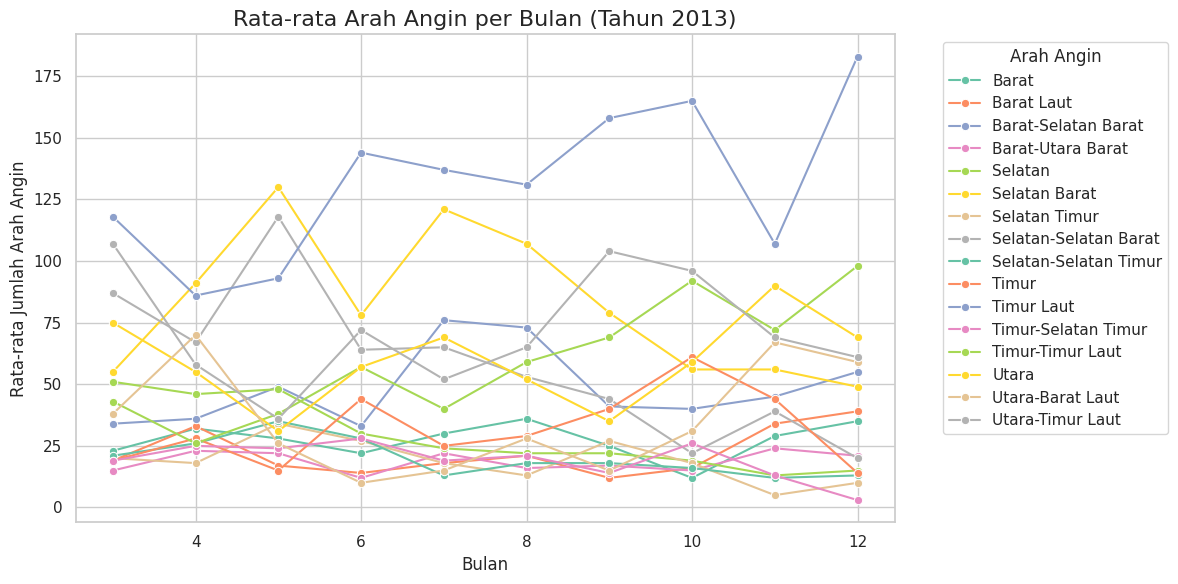

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan tahun, bulan, dan arah angin
wind_direction_by_year_month = aotizhongxin_df_clean.groupby(['year', 'month', 'wind_direction']).size().reset_index(name='count')

# Filter data hanya untuk tahun 2013
wind_direction_2013 = wind_direction_by_year_month[wind_direction_by_year_month['year'] == 2013]

# Membuat pivot table untuk menghitung rata-rata frekuensi arah angin per bulan di tahun 2013
pivot_table_2013 = wind_direction_2013.pivot_table(index='month',
                                                   columns='wind_direction',
                                                   values='count',
                                                   aggfunc='mean',
                                                   fill_value=0)

# Membuat grafik untuk tahun 2013
plt.figure(figsize=(12, 6))

# Menentukan warna untuk visualisasi
sns.set_palette("Set2")

# Membuat grafik garis untuk tiap arah angin
for wind_dir in pivot_table_2013.columns:
    sns.lineplot(x=pivot_table_2013.index, y=pivot_table_2013[wind_dir], marker='o', label=wind_dir)

# Menambahkan label dan judul
plt.title('Rata-rata Arah Angin per Bulan (Tahun 2013)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Arah Angin', fontsize=12)
plt.legend(title='Arah Angin', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan grafik
plt.tight_layout()
plt.show()


Berdasarkan statistik rata rata arah mata angin per bulan tahun 2013, rata rata arah mata angin terbanyak (wind direction) ke arah Barat-Selatan, sedangkan yang terendah ke arah Timur-Selatan Timur.

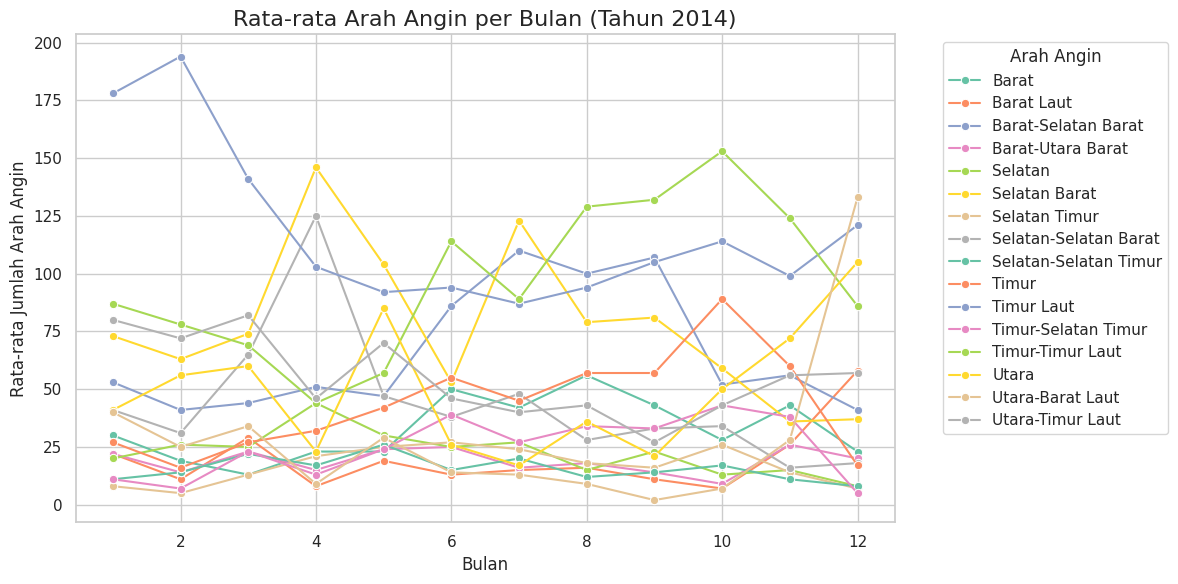

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan tahun, bulan, dan arah angin
wind_direction_by_year_month = aotizhongxin_df_clean.groupby(['year', 'month', 'wind_direction']).size().reset_index(name='count')

# Filter data hanya untuk tahun 2014
wind_direction_2014 = wind_direction_by_year_month[wind_direction_by_year_month['year'] == 2014]

# Membuat pivot table untuk menghitung rata-rata frekuensi arah angin per bulan di tahun 2014
pivot_table_2014 = wind_direction_2014.pivot_table(index='month',
                                                   columns='wind_direction',
                                                   values='count',
                                                   aggfunc='mean',
                                                   fill_value=0)

# Membuat grafik untuk tahun 2014
plt.figure(figsize=(12, 6))

# Menentukan warna untuk visualisasi
sns.set_palette("Set2")

# Membuat grafik garis untuk tiap arah angin
for wind_dir in pivot_table_2014.columns:
    sns.lineplot(x=pivot_table_2014.index, y=pivot_table_2014[wind_dir], marker='o', label=wind_dir)

# Menambahkan label dan judul
plt.title('Rata-rata Arah Angin per Bulan (Tahun 2014)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Arah Angin', fontsize=12)
plt.legend(title='Arah Angin', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan grafik
plt.tight_layout()
plt.show()


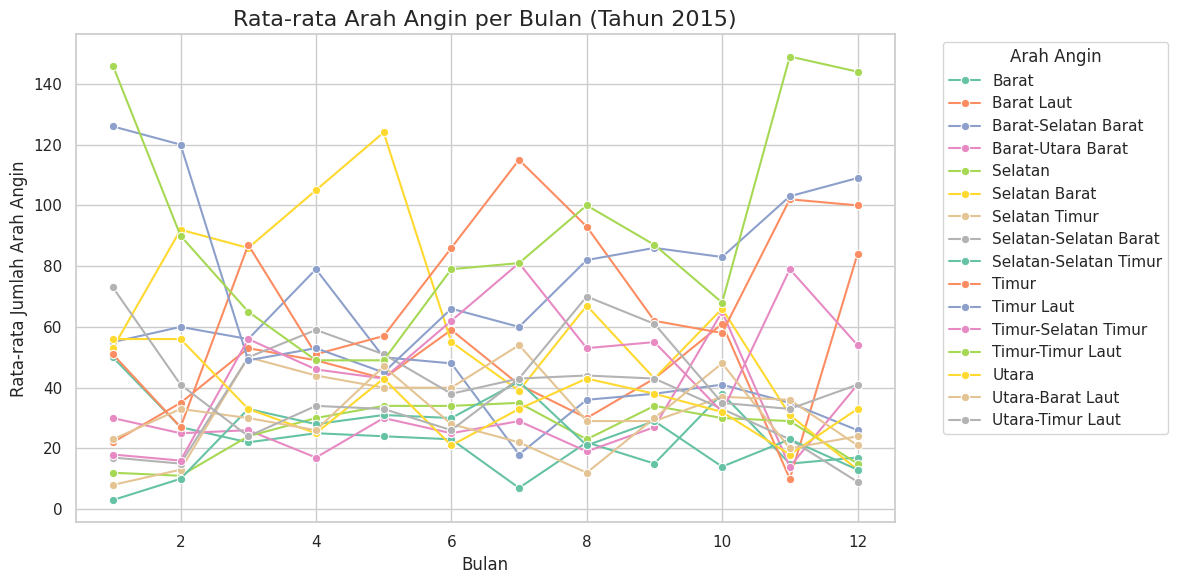

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan tahun, bulan, dan arah angin
wind_direction_by_year_month = aotizhongxin_df_clean.groupby(['year', 'month', 'wind_direction']).size().reset_index(name='count')

# Filter data hanya untuk tahun 2015
wind_direction_2015 = wind_direction_by_year_month[wind_direction_by_year_month['year'] == 2015]

# Membuat pivot table untuk menghitung rata-rata frekuensi arah angin per bulan di tahun 2015
pivot_table_2015 = wind_direction_2015.pivot_table(index='month',
                                                   columns='wind_direction',
                                                   values='count',
                                                   aggfunc='mean',
                                                   fill_value=0)

# Membuat grafik untuk tahun 2015
plt.figure(figsize=(12, 6))

# Menentukan warna untuk visualisasi
sns.set_palette("Set2")

# Membuat grafik garis untuk tiap arah angin
for wind_dir in pivot_table_2015.columns:
    sns.lineplot(x=pivot_table_2015.index, y=pivot_table_2015[wind_dir], marker='o', label=wind_dir)

# Menambahkan label dan judul
plt.title('Rata-rata Arah Angin per Bulan (Tahun 2015)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Arah Angin', fontsize=12)
plt.legend(title='Arah Angin', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan grafik
plt.tight_layout()
plt.show()


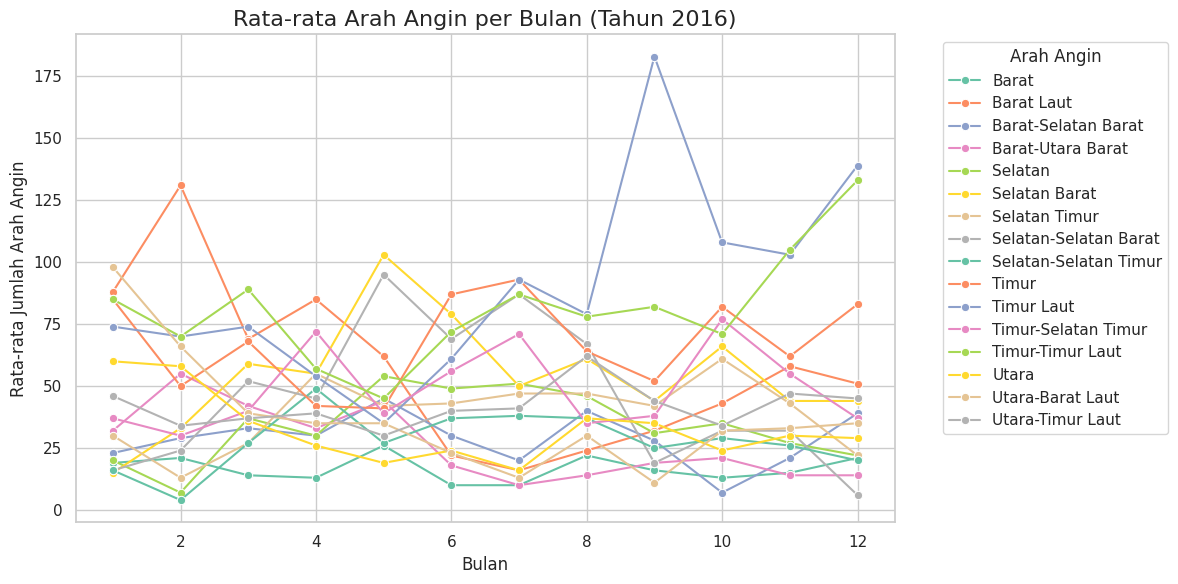

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan tahun, bulan, dan arah angin
wind_direction_by_year_month = aotizhongxin_df_clean.groupby(['year', 'month', 'wind_direction']).size().reset_index(name='count')

# Filter data hanya untuk tahun 2016
wind_direction_2016 = wind_direction_by_year_month[wind_direction_by_year_month['year'] == 2016]

# Membuat pivot table untuk menghitung rata-rata frekuensi arah angin per bulan di tahun 2016
pivot_table_2016 = wind_direction_2016.pivot_table(index='month',
                                                   columns='wind_direction',
                                                   values='count',
                                                   aggfunc='mean',
                                                   fill_value=0)

# Membuat grafik untuk tahun 2016
plt.figure(figsize=(12, 6))

# Menentukan warna untuk visualisasi
sns.set_palette("Set2")

# Membuat grafik garis untuk tiap arah angin
for wind_dir in pivot_table_2016.columns:
    sns.lineplot(x=pivot_table_2016.index, y=pivot_table_2016[wind_dir], marker='o', label=wind_dir)

# Menambahkan label dan judul
plt.title('Rata-rata Arah Angin per Bulan (Tahun 2016)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Arah Angin', fontsize=12)
plt.legend(title='Arah Angin', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan grafik
plt.tight_layout()
plt.show()


### Korelasi Matrix Antar Fitur

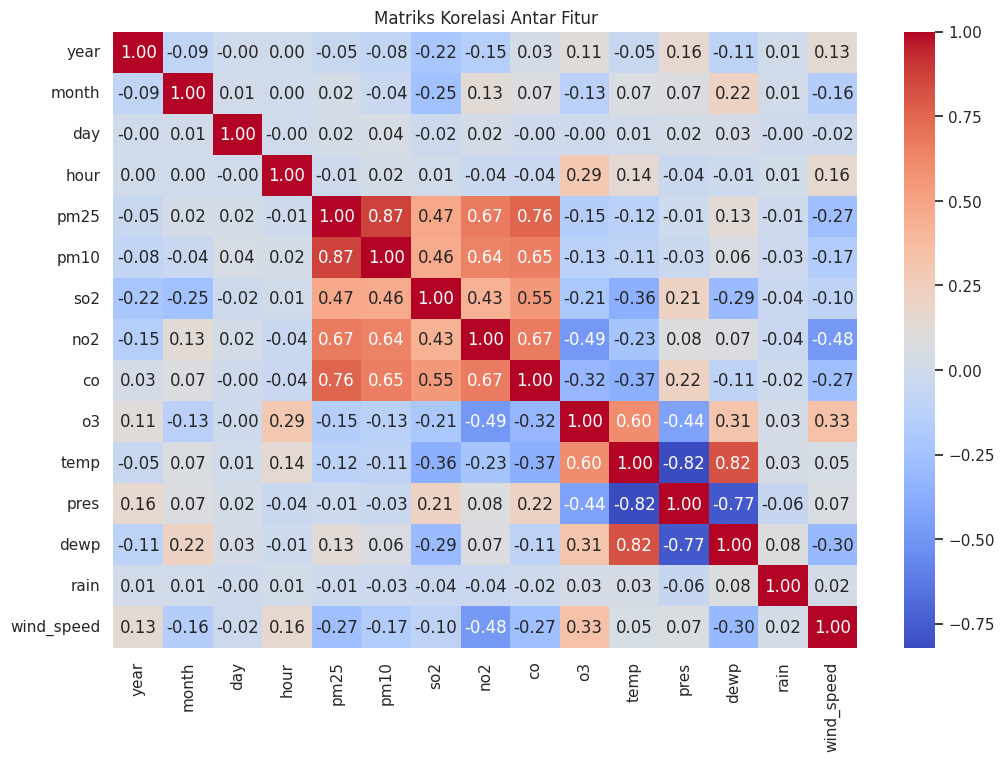

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik untuk analisis numerik
numerical_cols = aotizhongxin_df_clean.select_dtypes(include=['float64', 'int64']).columns

# Korelasi antar fitur numerik
correlation_matrix = aotizhongxin_df_clean[numerical_cols].corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()


### Statistik Polutan

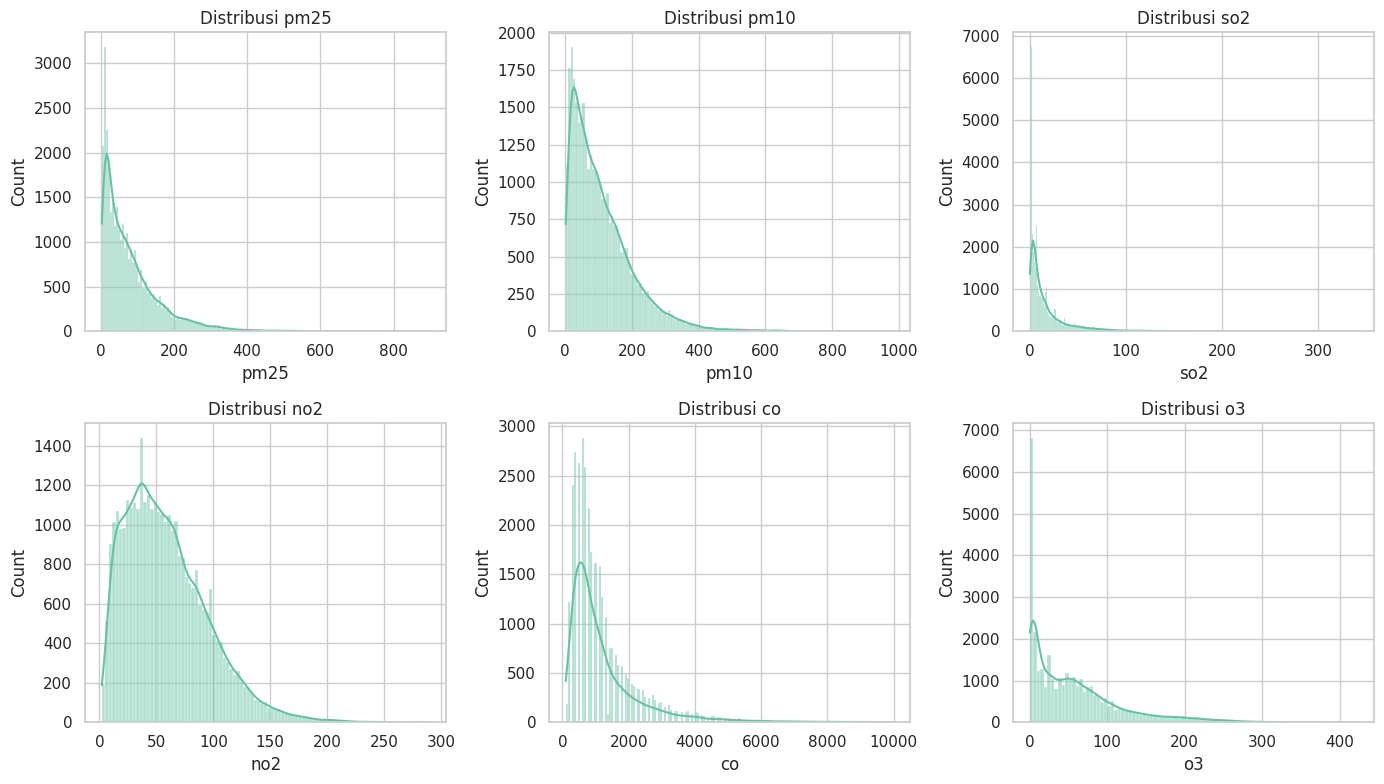

In [21]:
# Visualisasi distribusi polutan PM2.5, PM10, SO2, NO2, CO, O3
plt.figure(figsize=(14, 8))

# Subplot untuk setiap polutan
pollutants = ['pm25', 'pm10', 'so2', 'no2', 'co', 'o3']
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(aotizhongxin_df_clean[pollutant], kde=True)
    plt.title(f"Distribusi {pollutant}")

plt.tight_layout()
plt.show()


### Statistik Polusi Per Bulan

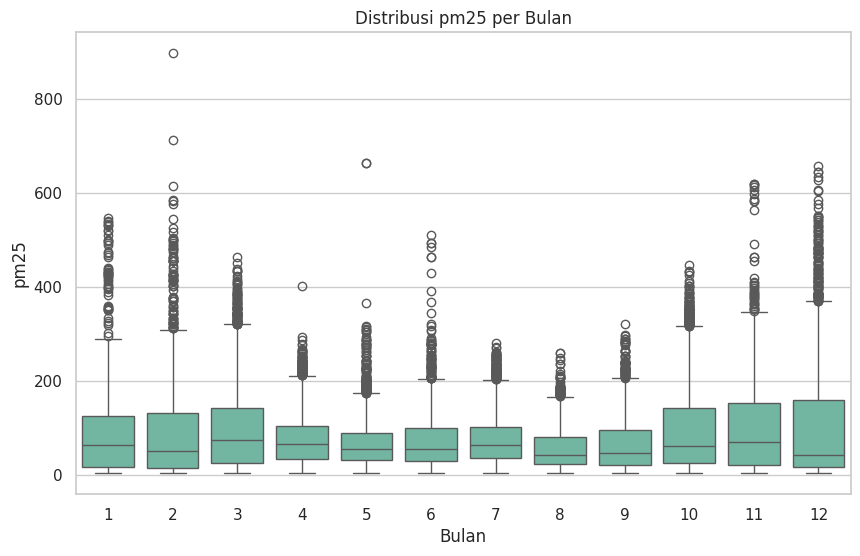

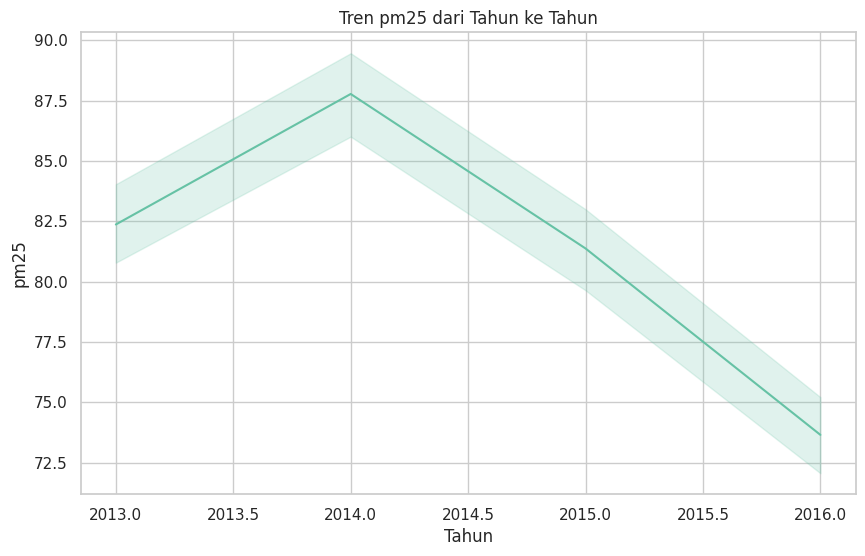

In [22]:
# Visualisasi polusi berdasarkan bulan
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='pm25', data=aotizhongxin_df_clean)
plt.title('Distribusi pm25 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('pm25')
plt.show()

# Visualisasi polusi berdasarkan tahun
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='pm25', data=aotizhongxin_df_clean)
plt.title('Tren pm25 dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('pm25')
plt.show()


### Statistik Distribusi Arah Angin

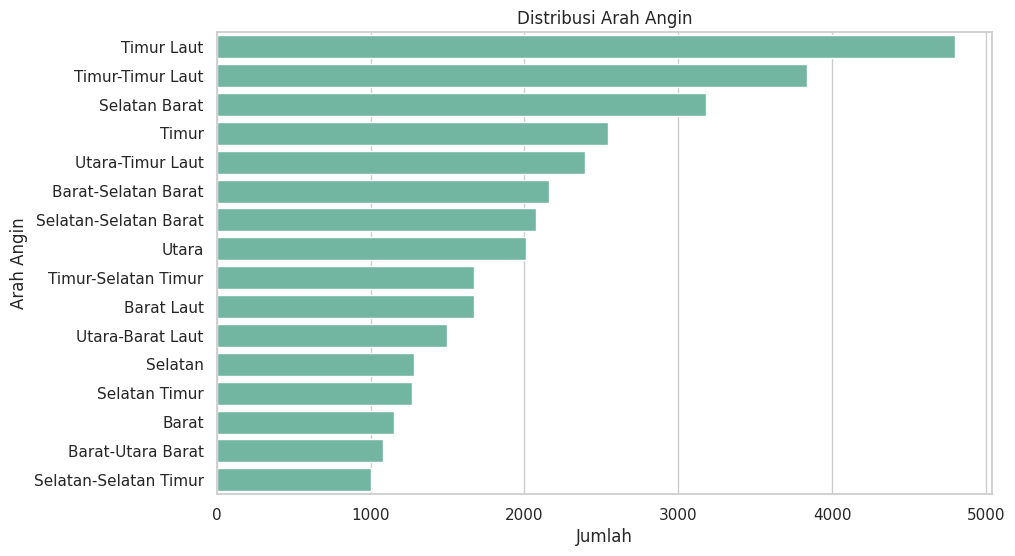

In [23]:
# Visualisasi arah angin
plt.figure(figsize=(10, 6))
sns.countplot(y='wind_direction', data=aotizhongxin_df_clean, order=aotizhongxin_df_clean['wind_direction'].value_counts().index)
plt.title('Distribusi Arah Angin')
plt.xlabel('Jumlah')
plt.ylabel('Arah Angin')
plt.show()


### Statistik Kecepatan Angin

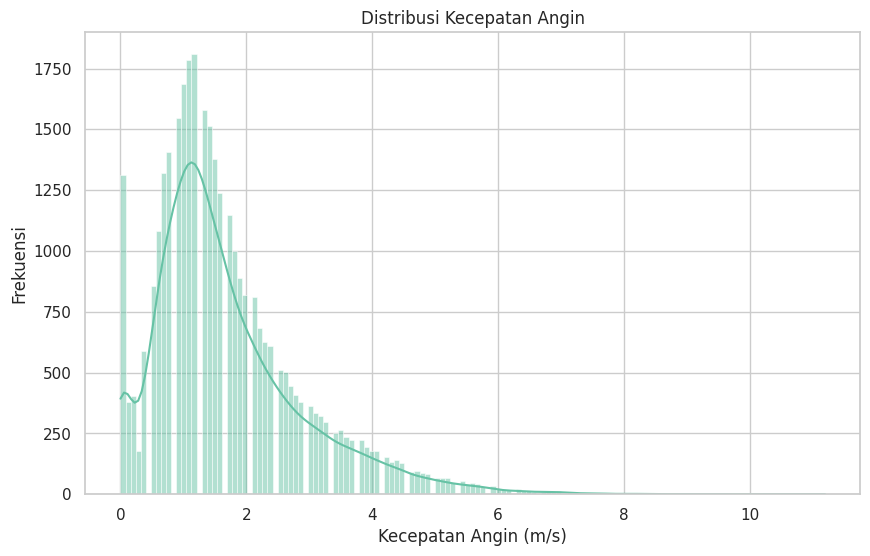

In [24]:
# Visualisasi kecepatan angin
plt.figure(figsize=(10, 6))
sns.histplot(aotizhongxin_df_clean['wind_speed'], kde=True)
plt.title('Distribusi Kecepatan Angin')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Frekuensi')
plt.show()


### Statistik Outlier Pada Polutan

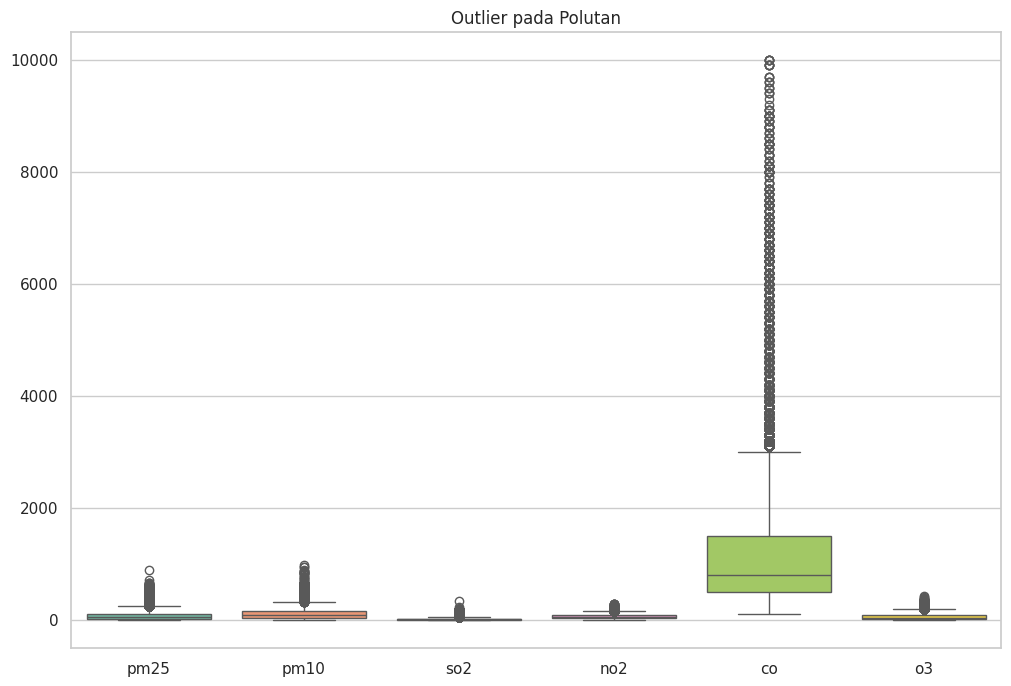

In [25]:
# Boxplot untuk memeriksa outlier pada polutan
plt.figure(figsize=(12, 8))
sns.boxplot(data=aotizhongxin_df_clean[pollutants])
plt.title('Outlier pada Polutan')
plt.show()


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana tren suhu rata-rata harian berubah dari tahun ke tahun selama periode 2013–2016 di stasiun Aotizhongxin?

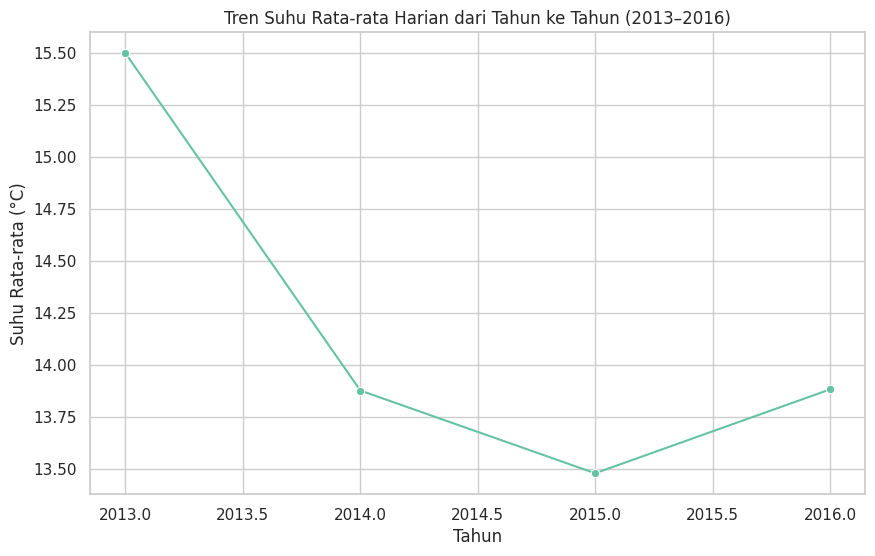

In [26]:
# Menghitung rata-rata suhu harian per tahun
aotizhongxin_df_clean['date'] = pd.to_datetime(aotizhongxin_df_clean[['year', 'month', 'day']])
aotizhongxin_df_clean['day_avg_temp'] = aotizhongxin_df_clean.groupby('date')['temp'].transform('mean')

# Mengambil rata-rata suhu per tahun
avg_temp_per_year = aotizhongxin_df_clean.groupby(aotizhongxin_df_clean['year'])['day_avg_temp'].mean()

# Visualisasi tren suhu rata-rata harian per tahun
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_temp_per_year.index, y=avg_temp_per_year.values, marker='o')
plt.title('Tren Suhu Rata-rata Harian dari Tahun ke Tahun (2013–2016)')
plt.xlabel('Tahun')
plt.ylabel('Suhu Rata-rata (°C)')
plt.grid(True)
plt.show()


Kesimpulan

Grafik menunjukkan tren suhu rata-rata harian dari tahun 2013 hingga 2016. Suhu tertinggi tercatat pada tahun 2013 (15,5°C), lalu turun hingga mencapai titik terendah pada 2015 (13,5°C). Pada tahun 2016, suhu mengalami kenaikan ringan (13,9°C). Grafik ini memperlihatkan pola penurunan suhu yang kemudian sedikit membaik.

### Pertanyaan 2:

Bagaimana pengaruh arah dan kecepatan angin terhadap suhu ekstrem (tinggi dan rendah) di area Aotizhongxin?

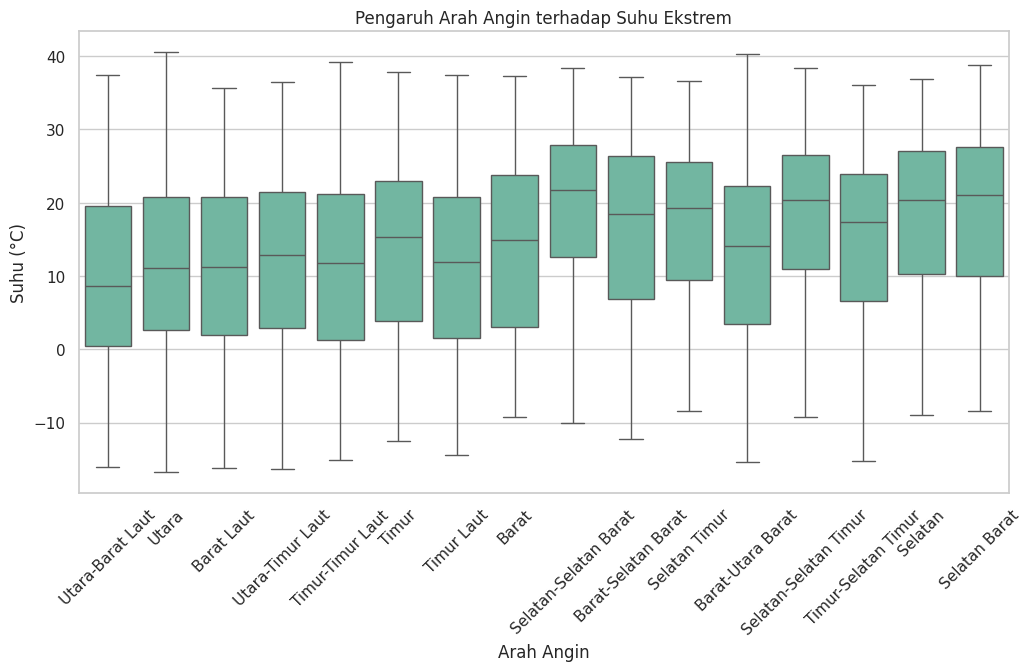

In [27]:
# Visualisasi pengaruh arah angin terhadap suhu maksimum
plt.figure(figsize=(12, 6))
sns.boxplot(x='wind_direction', y='temp', data=aotizhongxin_df_clean)
plt.title('Pengaruh Arah Angin terhadap Suhu Ekstrem')
plt.xlabel('Arah Angin')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.show()


Berdasarkan boxplot pada gambar, dapat disimpulkan bahwa arah angin memiliki pengaruh yang cukup signifikan terhadap suhu ekstrem di area Aotizhongxin:

1. Arah angin dari selatan (seperti Selatan-Barat, Selatan-Timur, Selatan-Selatan Barat) cenderung menghasilkan suhu ekstrem yang lebih tinggi, baik pada suhu maksimum maupun median.

2. Arah angin dari utara dan barat laut (misalnya Utara, Barat Laut, dan Utara-Barat Laut) cenderung menghasilkan suhu yang lebih rendah, termasuk suhu minimum yang ekstrem.

3. Terdapat variasi besar dalam sebaran suhu untuk hampir semua arah angin, tetapi arah angin selatan lebih konsisten terkait suhu tinggi.

Dengan demikian, angin dari arah selatan berkorelasi dengan suhu lebih panas, sedangkan angin dari arah utara dan barat laut lebih berkorelasi dengan suhu dingin ekstrem.

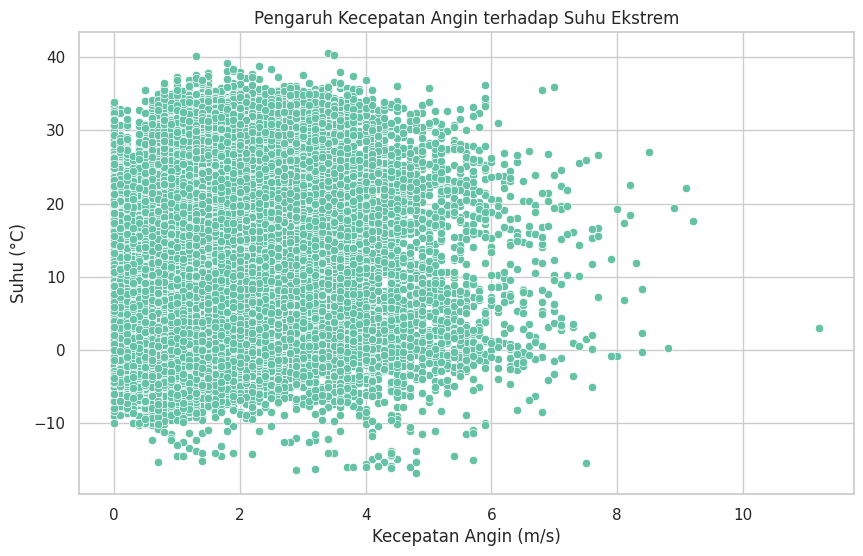

In [28]:
# Visualisasi pengaruh kecepatan angin terhadap suhu maksimum
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='temp', data=aotizhongxin_df_clean)
plt.title('Pengaruh Kecepatan Angin terhadap Suhu Ekstrem')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Suhu (°C)')
plt.grid(True)
plt.show()


Berdasarkan scatter plot pada gambar tersebut, terlihat bahwa:

1. Suhu ekstrem tinggi (di atas 30°C) lebih sering terjadi pada kecepatan angin rendah, umumnya di bawah 3 m/s.

2. Kecepatan angin yang lebih tinggi (di atas 5 m/s) cenderung mengurangi kemungkinan terjadinya suhu ekstrem tinggi, dan lebih banyak berkaitan dengan suhu sedang hingga rendah.

3. Titik-titik suhu sangat rendah juga tersebar pada berbagai kecepatan angin, tetapi tetap dominan pada kecepatan rendah hingga sedang.

Dengan demikian, kecepatan angin yang rendah berkorelasi dengan suhu ekstrem panas, sementara kecepatan tinggi cenderung menurunkan suhu ekstrem di area Aotizhongxin.

### Pertanyaan 3:

Apakah ada pola musiman terhadap suhu maksimum dan minimum di stasiun Aotizhongxin selama tahun 2013–2016?

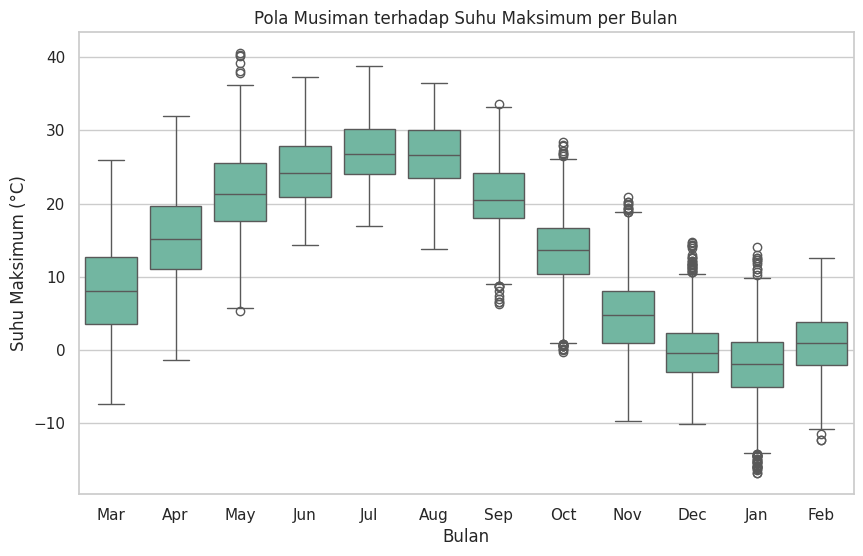

In [29]:
# Mengonversi angka bulan ke nama bulan
aotizhongxin_df_clean['month_name'] = aotizhongxin_df_clean['month'].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# Visualisasi pola musiman suhu maksimum per bulan
plt.figure(figsize=(10, 6))
sns.boxplot(x='month_name', y='temp', data=aotizhongxin_df_clean)
plt.title('Pola Musiman terhadap Suhu Maksimum per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Suhu Maksimum (°C)')
plt.show()


Kesimpulan

Berdasarkan grafik boxplot suhu maksimum per bulan di stasiun Aotizhongxin selama tahun 2013–2016, terlihat adanya pola musiman yang jelas:

1. Suhu maksimum tertinggi terjadi pada bulan Juli dan Agustus, dengan median sekitar 30°C — ini menunjukkan puncak musim panas.

2. Suhu maksimum terendah terjadi pada bulan Desember hingga Februari, dengan banyak nilai di bawah 0°C — mencerminkan musim dingin yang ekstrem.

3. Transisi suhu terlihat bertahap: meningkat dari Maret ke Juli, dan menurun kembali dari September ke Desember.

Kesimpulan: Terdapat pola musiman yang konsisten, dengan suhu maksimum tertinggi di musim panas (Juli–Agustus) dan terendah di musim dingin (Desember–Februari).

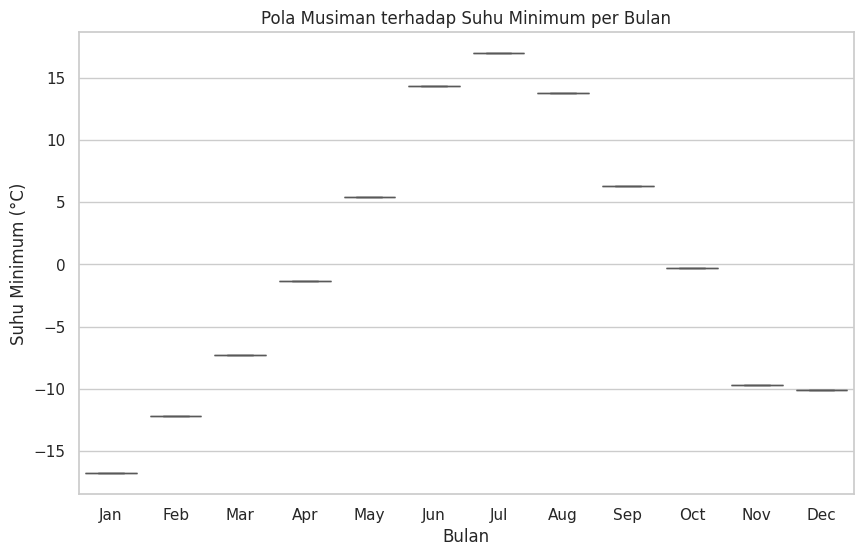

In [30]:
# 1. Tambahkan kolom month_name di df utama (berisi nama bulan 3 huruf)
month_map = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
aotizhongxin_df_clean['month_name'] = aotizhongxin_df_clean['month'].map(month_map)

# 2. Hitung suhu minimum per bulan
min_temp_per_month = aotizhongxin_df_clean.groupby('month')['temp'].min().reset_index()
min_temp_per_month['month_name'] = min_temp_per_month['month'].map(month_map)
min_temp_per_month = min_temp_per_month.rename(columns={'temp': 'min_temp'})

# 3. Gabungkan hasilnya ke dataframe utama
aotizhongxin_df_clean = pd.merge(aotizhongxin_df_clean, min_temp_per_month[['month_name', 'min_temp']], on='month_name', how='left')

# 4. Visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x='month_name', y='min_temp', data=aotizhongxin_df_clean,
            order=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title('Pola Musiman terhadap Suhu Minimum per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Suhu Minimum (°C)')
plt.show()


Kesimpulan
Terdapat pola musiman yang jelas terhadap suhu minimum:

1. Suhu minimum sangat rendah di bulan-bulan musim dingin (Desember, Januari, Februari)
   - Suhu minimum mencapai sekitar -17°C pada Januari.
   - Februari dan Desember juga menunjukkan suhu di bawah -10°C.

2. Suhu minimum meningkat secara bertahap memasuki musim semi dan puncaknya terjadi di musim panas (Juni, Juli, Agustus)
   - Pada bulan Juli, suhu minimum mencapai puncaknya sekitar 17°C.
   - Ini menunjukkan musim panas yang hangat dengan malam yang tidak terlalu dingin.

3. Setelah Agustus, suhu kembali menurun secara bertahap menuju musim gugur dan dingin lagi di bulan November dan Desember.